---

<center> <h1> Medal Counts of Olympic Athletes Dataset </h1> </center>

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Basic Libraries
import numpy as np

import pandas as pd
import seaborn as sb
import seaborn as sn # data visualization
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.pyplot as ml #data visualization
sb.set() # set the default Seaborn style for grap

# Import plotly graph go & offline py
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import math

**This part of the notebook will focus on:**
1. Total Medals Won By Country (1960 - 2018)
2. Total Medals Won By Singapore @ Olympics & Other Information
3. Predict Total Medals A Country Can Win
4. Linear Regression to Predict Medals Count
5. Possible Other Factors

In [3]:
#Import completed athlete data csv file into notebook
athleteComplete = pd.read_csv('Cleaned Data/athleteComplete.csv')
athleteComplete.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,CHN,8.560550e+12,1.350695e+09
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NLD,2.585680e+11,1.476009e+07
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,NLD,2.585680e+11,1.476009e+07
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NLD,3.583300e+11,1.518417e+07


***

## Section 1: Total medals Won By Country (1960 - 2018)

**Setup a function that returns 3 new columns, Gold silver bronze, under these specific conditions:**
* Return 1 if that athlete won a corresponding medal, else it will display a 0.
* Same rules apply to Silver and Bronze

In [4]:
#Creating binary columns for medals
def gold_m(athleteComplete)  :
    if athleteComplete["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silver_m(athleteComplete)  :
    if athleteComplete["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronze_m(athleteComplete)  :
    if athleteComplete["Medal"] == "Bronze" :
        return 1 
    else :
        return 0
    
athleteComplete["Gold"]   = athleteComplete.apply(lambda athleteComplete:gold_m(athleteComplete),axis = 1) 
athleteComplete["Silver"] = athleteComplete.apply(lambda athleteComplete:silver_m(athleteComplete),axis = 1) 
athleteComplete["Bronze"] = athleteComplete.apply(lambda athleteComplete:bronze_m(athleteComplete),axis = 1) 
athleteComplete["Total"] = athleteComplete["Gold"] + athleteComplete["Silver"] +athleteComplete["Bronze"]

However, if we are using the data as above to tabulate the total medals, it will not be very accurate either as singapore only has 5 medals up till date and it is reflected at 9 in the table. As the table only takes into consideration 1 medal for every individual in the team! 

<p>For example:

In [5]:
athSGP = athleteComplete[(athleteComplete.Team == 'Singapore')]
sgpMedalonly = athSGP.drop(athSGP[athSGP.Medal == 'No Medal'].index)
sgpMedalonly

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Team,Country Code,GDP,Population,Gold,Silver,Bronze,Total
51756,34619,Feng Tian Wei,F,21.0,163.0,55.0,SGP,2008 Summer,2008,Summer,...,Table Tennis Women's Team,Silver,Singapore,SGP,1.922260e+11,4839396.0,0,1,0,1
51757,34619,Feng Tian Wei,F,25.0,163.0,55.0,SGP,2012 Summer,2012,Summer,...,Table Tennis Women's Singles,Bronze,Singapore,SGP,2.891620e+11,5312437.0,0,0,1,1
51758,34619,Feng Tian Wei,F,25.0,163.0,55.0,SGP,2012 Summer,2012,Summer,...,Table Tennis Women's Team,Bronze,Singapore,SGP,2.891620e+11,5312437.0,0,0,1,1
106131,69392,Li Jia Wei,F,26.0,170.0,60.0,SGP,2008 Summer,2008,Summer,...,Table Tennis Women's Team,Silver,Singapore,SGP,1.922260e+11,4839396.0,0,1,0,1
106132,69392,Li Jia Wei,F,30.0,170.0,60.0,SGP,2012 Summer,2012,Summer,...,Table Tennis Women's Team,Bronze,Singapore,SGP,2.891620e+11,5312437.0,0,0,1,1
164938,107436,Joseph Isaac Schooling,M,21.0,184.0,74.0,SGP,2016 Summer,2016,Summer,...,Swimming Men's 100 metres Butterfly,Gold,Singapore,SGP,2.969760e+11,5607283.0,1,0,0,1
181859,118289,"Howe Liang ""Tiger"" Tan",M,27.0,160.0,69.5,SGP,1960 Summer,1960,Summer,...,Weightlifting Men's Lightweight,Silver,Singapore,SGP,7.044623e+08,1646400.0,0,1,0,1
197445,128496,Wang Jue Gu,F,28.0,155.0,63.0,SGP,2008 Summer,2008,Summer,...,Table Tennis Women's Team,Silver,Singapore,SGP,1.922260e+11,4839396.0,0,1,0,1
197447,128496,Wang Jue Gu,F,32.0,155.0,63.0,SGP,2012 Summer,2012,Summer,...,Table Tennis Women's Team,Bronze,Singapore,SGP,2.891620e+11,5312437.0,0,0,1,1


If were to wikipedia for the Olympic results for Singapore, there is only 5 medal count, reason being each team medal is only consider as 1 and 1 only if they were to win regardless of no. of athlete in that team itself.

In [6]:
sgpMedalonlytest = sgpMedalonly.drop_duplicates(["NOC","Games", "Year","Season","City", "Sport", "Event", "Medal"])

totalMedalSGP = sgpMedalonlytest.Team.value_counts().reset_index(name='Medal')
totalMedalSGP.columns = ['Team','Total_Medal']
totalMedalSGP

,Team,Total_Medal
0,Singapore,5


This is a more accurate representation, we will use this data and present it in a more suitable fashion.

In [7]:
#Then the same logic can be applied to other countries in the current DF as well
athleteDatas_individuals_Medal = athleteComplete.drop_duplicates(["NOC","Games", "Year","Season","City", "Sport", "Event", "Medal"])

In [8]:
#Creating binary columns for medals
def gold_m(athleteDatas_individuals_Medal)  :
    if athleteDatas_individuals_Medal["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silver_m(athleteDatas_individuals_Medal)  :
    if athleteDatas_individuals_Medal["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronze_m(athleteDatas_individuals_Medal)  :
    if athleteDatas_individuals_Medal["Medal"] == "Bronze" :
        return 1 
    else :
        return 0
    
athleteDatas_individuals_Medal["Gold"]   = athleteDatas_individuals_Medal.apply(lambda athleteDatas_individuals_Medal:gold_m(athleteDatas_individuals_Medal),axis = 1) 
athleteDatas_individuals_Medal["Silver"] = athleteDatas_individuals_Medal.apply(lambda athleteDatas_individuals_Medal:silver_m(athleteDatas_individuals_Medal),axis = 1) 
athleteDatas_individuals_Medal["Bronze"] = athleteDatas_individuals_Medal.apply(lambda athleteDatas_individuals_Medal:bronze_m(athleteDatas_individuals_Medal),axis = 1) 
athleteDatas_individuals_Medal["Total"] = athleteDatas_individuals_Medal["Gold"] + athleteDatas_individuals_Medal["Silver"] +athleteDatas_individuals_Medal["Bronze"]

In [9]:
# Since we are only interested in Summer games - dropping winter season 
ad = athleteDatas_individuals_Medal[athleteDatas_individuals_Medal.Season != 'Winter']
ad.head(3)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Team,Country Code,GDP,Population,Gold,Silver,Bronze,Total
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,Basketball Men's Basketball,No Medal,China,CHN,4.269160e+11,1.164970e+09,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,No Medal,China,CHN,8.560550e+12,1.350695e+09,0,0,0,0
26,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,...,Badminton Men's Singles,No Medal,Finland,FIN,1.255400e+11,5.176209e+06,0,0,0,0


In [10]:
cou_med = ad.groupby("Team")["Gold","Silver","Bronze"].sum().reset_index()
cou_med["Total"] = cou_med["Gold"] + cou_med["Silver"] + cou_med["Bronze"]
cou_med = cou_med.sort_values(by = ["Total","Gold","Silver","Bronze"],ascending = False)
cou_med = cou_med.rename(columns={"Team" : "Country"})

t = go.Table(header=dict(values = cou_med.columns.tolist(),
                         line = dict(color = 'black'),
                         align = ['left','center'],
                         fill  = dict(color = [ "Skyblue","Gold","Silver","darkgoldenrod","Green"]),
                         font = dict(color = 'black', size = 14)
                        ),
             cells  = dict(values = [cou_med.Country,cou_med.Gold,cou_med.Silver,
                                     cou_med.Bronze,cou_med.Total],
                           line = dict(color = '#506784'),
                           align = ['left','center'],
                           fill  = dict(color = "#F5F8FF"),
                          )
            )
data = [t]

l = go.Layout(dict(title = "Medals of each countries 1960 ~ 2016 (In descending order for Summer ONLY)"))
f = go.Figure(data=data,layout=l)
py.iplot(f)

In [11]:
#Bubble plot for Countries 
#Data for bubble plot
yearly_top_n = ad.groupby(["Year","Team"])["Gold","Silver","Bronze"].sum().reset_index()
yearly_top_n["Total"] = yearly_top_n["Gold"] + yearly_top_n["Silver"] + yearly_top_n["Bronze"]
yearly_top_n = yearly_top_n.sort_values(by = ["Total","Gold","Silver","Bronze"],ascending  = False)


#function for bubble plot
def plot_top_nations(df,country,ratio) : 
    tracer = go.Scatter(x = df[df["Team"] == country]["Year"],
                        y = df[df["Team"] == country]["Total"],
                        mode  = "markers",
                        marker = dict(line = dict(width =1,color = "black"),
                                      size = df[df["Team"] == country]["Total"]/ratio,
                                     ),
                        name  = country 
                       )
    return tracer

def plot_layout(title) :
    layout = go.Layout(dict(title = title,
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Year",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Medal Count",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2
                                    ),
                        paper_bgcolor = "rgb(243,243,243)",
                        plot_bgcolor  = "rgb(243,243,243)",
                       )
                  )
    return layout

#plotting summer olympics
ts1 = plot_top_nations(yearly_top_n,"USA",10)
ts2 = plot_top_nations(yearly_top_n,"Russia",15)
ts3 = plot_top_nations(yearly_top_n,'Germany',10)
ts4 = plot_top_nations(yearly_top_n,'UK',5)
ts5 = plot_top_nations(yearly_top_n,"France",5)
ts6 = plot_top_nations(yearly_top_n,"Singapore",2)


dat1 = [ts1,ts2,ts3,ts4,ts5,ts6]
lay1 = plot_layout("Top 5 countries' medals & Singapore in Olympics over the years")
fig1 = go.Figure(data=dat1,layout=lay1)

py.iplot(fig1)

### SUMMARY OF FINDINGS:

* Top 3 countries are: USA, Russia & Germany
* Interestingly, from 1960, Russia was leading up till 1968, where USA overtook.
* And in 1972 onwards, Germany overtooked both countries till 1976.

### Over the years till 2016:
* Germany returned to the top in 1980.
* But was overtooked by USA in 1984. 
* For the rest of the years USA, tend to remain on top as compared to other countries at Olympics.

## But where is Singapore?

***

## Section 2: Total Medals Won By Singapore @ Olympics & Other Information

In [12]:
def country_wise_analysis(country_name) :
    
    data   = ad[ad["Team"] == country_name].sort_values(by = "Year",
                                                                  ascending = False)
    
    gold = ad[(ad.Medal == 'Gold')]
    goldSGP = gold[(gold.Team == 'Singapore')]
    #Drop duplicates of athletes name
    #goldSGP = goldSGP.drop_duplicates(["Name"])

    
    BLUE = '\033[34m'
    RED = '\033[91m'
    PURPLE = '\033[95m'
    UNDERLINE = '\033[4m'
    BOLD = '\033[1m'
    END = '\033[0m'

    print (BLUE+UNDERLINE+BOLD+country_name+END)
    print ("--------------------")
    print ("Olympics appearances        : " , data["Games"].nunique(),"\n")

    print ("Total Participants          : ", data["ID"].nunique())
    print ("Female Participants         : ", data[data["Sex"] == "F"]["ID"].nunique(),
           ", Percent : " ,
           np.around(data[data["Sex"] == "F"]["ID"].nunique()/data["ID"].nunique()*100,2),
           "%")
    print ("Male   Participants         : ", data[data["Sex"] == "M"]["ID"].nunique(),
           ", Percent : " ,
           np.around(data[data["Sex"] == "M"]["ID"].nunique()/data["ID"].nunique()*100,2),
           "%", "\n")

    female_events = data[data["Sex"] == "F"]["Event"].unique().tolist()
    male_events   = data[data["Sex"] == "M"]["Event"].unique().tolist()
    both_events   = [x for x in male_events if x in female_events]

    print ("Total Medals                : ",data["Total"].sum() , "(medals include every individual medal in team sport)")
    print ("Gold                        : ",data["Gold"].sum())
    print ("Silver                      : ",data["Silver"].sum())
    print ("Bronze                      : ",data["Bronze"].sum(),"\n")
    pop_spo_sum   = (data.groupby("Sport")["Total"].sum().reset_index().
                     sort_values(by = "Total",ascending =False))
    print ("Popular Sports              : " ,pop_spo_sum["Sport"][:3].tolist())
    pop_play_sum  = (data.groupby(["Name","Sport"])["Total","Gold","Silver","Bronze"].sum().reset_index().
                    sort_values(by = ["Total","Gold","Silver","Bronze"],ascending =False))
    print ("Most Medals  (Athlete)      : " ,pop_play_sum.loc[pop_play_sum["Total"].idxmax()]["Name"],
           ",Sport - ", pop_play_sum.loc[pop_play_sum["Total"].idxmax()]["Sport"],"\n")
    
    print("Gold medalists              : ",goldSGP.iloc[0]["Name"], "-", goldSGP.iloc[0]["Event"]) 

In [13]:
country_wise_analysis("Singapore")

Singapore
--------------------
Olympics appearances        :  13 

Total Participants          :  97
Female Participants         :  41 , Percent :  42.27 %
Male   Participants         :  56 , Percent :  57.73 % 

Total Medals                :  5 (medals include every individual medal in team sport)
Gold                        :  1
Silver                      :  2
Bronze                      :  2 

Popular Sports              :  ['Table Tennis', 'Swimming', 'Weightlifting']
Most Medals  (Athlete)      :  Feng Tian Wei ,Sport -  Table Tennis 

Gold medalists              :  Joseph Isaac Schooling - Swimming Men's 100 metres Butterfly


### SUMMARY OF FINDINGS:

* Singapore has sent athletes to most Summer Olympic Games held since 1948.
* Upon Singapore's full independence from Malaysia in 1965, SGP has continued to participate in OLYMPICS till 1980.
* 1980 was the year when countries participated in a large Olympic boycott!

#### Medals?

* SGP won five Olympic medals.
* The first at the 1960 Summer Games.
* The second at the 2008 Summer Games. 
* And the third and fourth at the 2012 Summer Games
* At the 2016 Summer Games Singapore won their first ever gold medal and the fifth overall.

#### Who Won The 1st Medal &/Or Gold Medal For SGP?

* Singapore's first Olympic medal was won by Tan Howe Liang, who won silver in lightweight weightlifting in 1960. 
* The first Olympic gold medal was won by Joseph Schooling in the men's 100 metre butterfly at the 2016 Summer Olympics.

***

## Section 3: Predict Total Medals A Country Can Win

In [14]:
#First change medals to medal win & dnw
ad['Medal_Won'] = np.where(ad.loc[:,'Medal'] == 'No Medal', 0, 1)
ad.head(3)

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Medal,Team,Country Code,GDP,Population,Gold,Silver,Bronze,Total,Medal_Won
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,No Medal,China,CHN,4.269160e+11,1.164970e+09,0,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,No Medal,China,CHN,8.560550e+12,1.350695e+09,0,0,0,0,0
26,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,...,No Medal,Finland,FIN,1.255400e+11,5.176209e+06,0,0,0,0,0


In [15]:
# Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(ad,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('No Medal', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['Event'].unique()

remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = ad['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = ad['Medal_Won'] == 1

# Put 1 under team event if medal is won and event in team event list
ad['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
ad['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
ad['Event_Category'] = ad['Single_Event'] + \
ad['Team_Event']

medal_tally_agnostic = ad.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].\
agg('sum').reset_index()

medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']

In [16]:
# Medal Tally.
medal_tally = medal_tally_agnostic.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]

# print total medals won in the given period
medal_tally_pivot.loc[:,'All']

Team
USA        1458.0
Russia     1401.0
Germany    1084.0
China       545.0
Name: All, dtype: float64

Text(0, 0.5, 'Country')

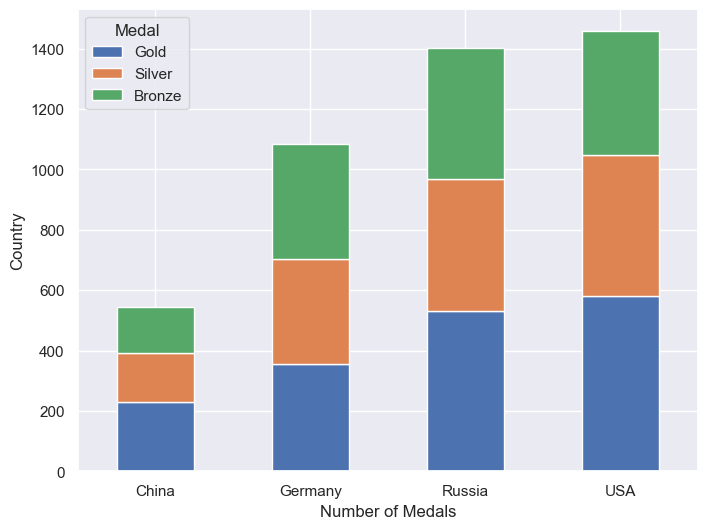

In [17]:
# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'China']

# row mask where countries match
row_mask_2 = medal_tally_agnostic['Team'].map(lambda x: x in top_countries)

# Pivot table to calculate sum of gold, silver and bronze medals for each country
medal_tally_specific = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                     index = ['Team'],
                                     columns = 'Medal',
                                     values = 'Medal_Won_Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('No Medal', axis = 1)

# Re-order the columns so that they appear in order on the chart.
medal_tally_specific = medal_tally_specific.loc[:, ['Gold', 'Silver', 'Bronze']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
plt.xlabel('Number of Medals')
plt.ylabel('Country')

This preliminary plot shows a count on total no. of medals that are won by each country under medal tally. 
<br>Let's take a look at if GDP affects the total no. of medals won via **correlation analysis**.

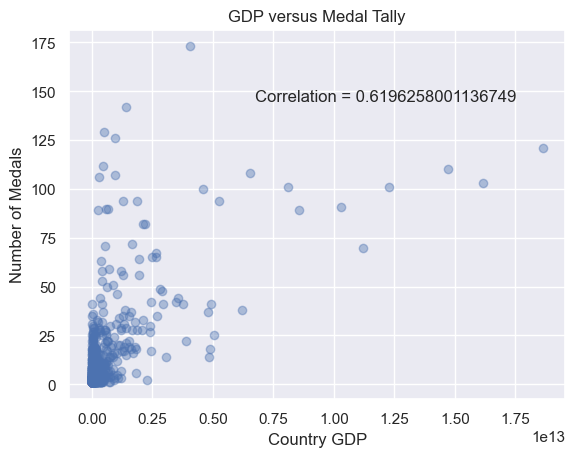

In [18]:
# Correlation between GDP & total no. of Medals won
year_team_gdp = ad.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medal_tally_gdp = medal_tally.merge(year_team_gdp,
                                    left_on=['Year', 'Team'],
                                    right_on=['Year', 'Team'],
                                    how='left')

# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'China']

row_mask_5 = medal_tally_gdp['Medal_Won_Corrected'] > 0
row_mask_6 = medal_tally_gdp['Team'].map(lambda x: x in top_countries)

# Calculate the correlation
correlation = medal_tally_gdp.loc[row_mask_5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

# Plot GDP vs Medal tally
plt.plot(medal_tally_gdp.loc[row_mask_5, 'GDP'], 
         medal_tally_gdp.loc[row_mask_5, 'Medal_Won_Corrected'], 
         linestyle='none', 
         marker='o',
         alpha=0.4)

# Adding labels and title
plt.xlabel('Country GDP')
plt.ylabel('Number of Medals')
plt.title('GDP versus Medal Tally')

# Add the correlation text on the plot
plt.text(np.nanpercentile(medal_tally_gdp['GDP'], 99.6), 
         max(medal_tally_gdp['Medal_Won_Corrected']) - 50,
         "Correlation = " + str(correlation))

# Show the plot
plt.show()

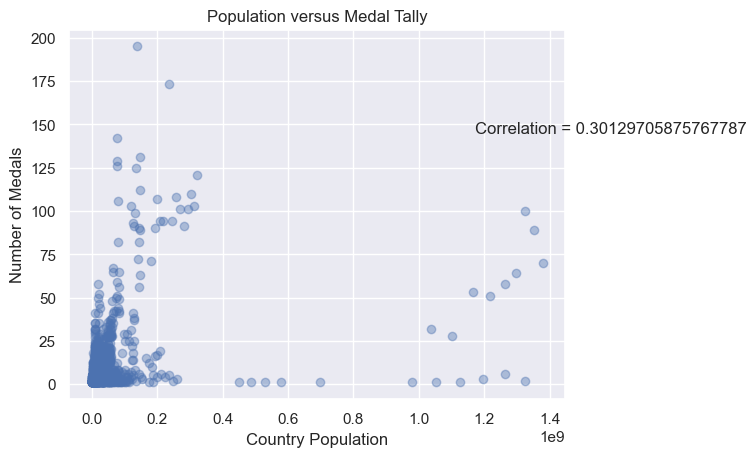

In [19]:
# Correlation between Population and total no. of Medals
year_team_pop = ad.loc[:, ['Year', 'Team', 'Population']].drop_duplicates()

medal_tally_pop = medal_tally.merge(year_team_pop,
                                    left_on=['Year', 'Team'],
                                    right_on=['Year', 'Team'],
                                    how='left')

# List of top countries
top_countries = ['USA', 'Russia', 'Germany', 'China']

row_mask_5 = medal_tally_pop['Medal_Won_Corrected'] > 0
row_mask_6 = medal_tally_pop['Team'].map(lambda x: x in top_countries)

# Calculate the correlation
correlation = medal_tally_pop.loc[row_mask_5, ['Population', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

# Plot Population vs Medal tally
plt.plot(medal_tally_pop.loc[row_mask_5, 'Population'], 
         medal_tally_pop.loc[row_mask_5, 'Medal_Won_Corrected'], 
         linestyle='none', 
         marker='o',
         alpha=0.4)

# Adding labels and title
plt.xlabel('Country Population')
plt.ylabel('Number of Medals')
plt.title('Population versus Medal Tally')

# Add the correlation text on the plot
plt.text(np.nanpercentile(medal_tally_pop['Population'], 99.6), 
         max(medal_tally_pop['Medal_Won_Corrected']) - 50,
         "Correlation = " + str(correlation))

# Show the plot
plt.show()

### Summary of Findings:

* The correlation between GDP and the number of medals (0.6196) is moderate to strong, ...
* indicating that wealthier countries (higher GDP) tend to win more medals. 
* This could be because countries with higher GDPs can invest more in sports infrastructure, athlete training programs, and 
* resources that improve their chances of winning medals.

### What about Population?
* The correlation between population and the number of medals (0.3012) is relatively weak. 
* While larger populations may have a bigger talent pool, but...
* this weaker correlation suggests that having a large population alone is not a strong predictor of medal success.

In [20]:
# Find correlation 
print(medal_gdp_population.corr())
sb.heatmap(medal_gdp_population.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

NameError: name 'medal_gdp_population' is not defined

***

## Section 4: Linear Regression to Predict Medals Count

Now let's try using Linear regression and if it is able to predict no. of medals, it does not necessary mean predicting the future but more of finding out if the variable has an effect on predicting the other variable. 
<p> E.g. using 1 independent variable to predict the dependent variable

In [ ]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
medal_gdp_population2 = medal_gdp_population.dropna(subset=['GDP', 'Population'])
medal_gdp_population2['LogPopulation'] = np.log(medal_gdp_population2['Population'])
medal_gdp_population2['LogGDP'] = np.log(medal_gdp_population2['GDP'])
medal_gdp_population2.head(3)

In [ ]:
# Splitting datasets (We will see if GDP & Population will predict for us the total no. of medals)
X = pd.DataFrame(medal_gdp_population2[["LogGDP", "LogPopulation"]])
y = pd.DataFrame(medal_gdp_population2["Medal_Won_Corrected"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20
)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t:', linreg.intercept_)
print('Coefficients of Regression \t:', linreg.coef_)
print()

# Predict y values
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(2, 1, figsize=(24, 24))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

Apparently it does not, the Explained variance is no where near to 1 as well. 
<p>Let's explore on what other variables we can add to the table that are possible to predict the no. of medals!

## Section 5: Possible Other Factors

In [ ]:
# Will the host country affect the no, of medal won? 

# Let's try and get the host country as well to see if it correlates to anything!
ad[['Year', 'City']].drop_duplicates().sort_values('Year')

In [ ]:
# Correct city names in the dataset
ad['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)

# city to country mapping dictionary
city_to_country = {'Roma':'Italy',
                  'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}

# Map cities to countries
ad['Country_Host'] = ad['City'].map(city_to_country)

#print the 
ad.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

In [ ]:
# Extract year, host nation and team name from the data
year_host_team = ad[['Year', 'Country_Host', 'Team']].drop_duplicates()

# check rows where host country is the same as team
row_mask_4 = (year_host_team['Country_Host'] == year_host_team['Team'])

# add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

# Subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

# Calculate the medals won in each year where a team played at home. merge year_host_team with medal_tally on year and team
year_host_team_medal = year_host_team.merge(medal_tally,
                                           left_on = ['Year', 'Team'],
                                           right_on = ['Year', 'Team'],
                                           how = 'left')

year_host_team_medal.rename(columns = {'Medal_Won_Corrected' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Prev_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)

# Calculate the medals won by the team the year after they hosted.
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Next_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Year_x': 'Year',
                                      'Medal_Won_Corrected' : 'Medal_Won_Next_Year'}, inplace = True)

# General formatting changes
year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
year_host_team_medal.sort_values('Year', ascending = True, inplace = True)
year_host_team_medal.reset_index(inplace = True, drop = True)

# column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Country_Host', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

year_host_team_medal

**Seems like general team tend to perform better when playing at home.**

In [ ]:
# Will the no. of athlete send per year affect the no. of medal ? 

# create the year, team contingent size
year_team_gender = ad.loc[:,['Year','Team', 'Name', 'Sex']].drop_duplicates()

year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()

# rename columns as per column names in the 0th level
year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)

# rename the columns appropriately
year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
year_team_gender_count = year_team_gender_count.fillna(0)

# get total athletes per team-year
year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']

year_team_contingent = year_team_gender_count.loc[:, ['Year', 'Team','Total_Athletes']]
year_team_contingent.head()

In [ ]:
medal_gdp_population3 = medal_gdp_population.merge(year_team_contingent,
                                            left_on = ['Year', 'Team'],
                                            right_on = ['Year', 'Team'],
                                            how = 'left')
medal_gdp_population3.head(3)

In [ ]:
# get host nation from the data
year_host = ad.loc[:, ['Year', 'Country_Host']].drop_duplicates()

# merge this with the larger dataset
athMo = medal_gdp_population3.merge(year_host,
                              left_on = 'Year',
                              right_on = 'Year',
                              how = 'left')

athMo.head()

In [ ]:
# Find correlation 
print(athMo.corr())
sb.heatmap(athMo.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".3f")

In [ ]:
medal_gdp_population3 = athMo.dropna(subset=['GDP', 'Population'])
medal_gdp_population3['LogPopulation'] = np.log(medal_gdp_population3['Population'])
medal_gdp_population3['LogGDP'] = np.log(medal_gdp_population3['GDP'])
medal_gdp_population3.head(3)

In [ ]:
# Splitting datasets
X = pd.DataFrame(medal_gdp_population3[["Total_Athletes","LogPopulation","LogGDP"]])
y = pd.DataFrame(medal_gdp_population3["Medal_Won_Corrected"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20
)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t:', linreg.intercept_)
print('Coefficients of Regression \t:', linreg.coef_)
print()

# Predict y values
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(2, 1, figsize=(24, 24))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### Summary of Findings:

Much better! 

* Olympic glory do correlate with the national economic performances.
* However it is very limited as seen from the first regression model. 
<br> 

**Other important factors may also affect the index:**
* Considering a large pool of atheletes (or contenders) are neccessary for a higher winning chance.
* Both China and U.S.A can be viewed as countries with greater population.
<br>

**What we can conclude from the second linear regression model:**
* Wealthier country may tend to be more competent in all the sports events
* Larger population = More athletes send to participate = higher chance of winning medals

---

## Reference materials & Sources: 

1. https://chrisalbon.com/python/data_wrangling/
2. Data for Athletes for most appearance (Top 50) from: https://en.wikipedia.org/wiki/List_of_athletes_with_the_most_appearances_at_Olympic_Games
3. https://www.theanalysisfactor.com/regression-modelshow-do-you-know-you-need-a-polynomial/


---